# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Using-Kleinberg's-Grid-Simulator" data-toc-modified-id="Using-Kleinberg's-Grid-Simulator-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Using Kleinberg's Grid Simulator</a></div><div class="lev1 toc-item"><a href="#Initialization" data-toc-modified-id="Initialization-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Initialization</a></div><div class="lev1 toc-item"><a href="#First-Example:-Computation-Time" data-toc-modified-id="First-Example:-Computation-Time-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>First Example: Computation Time</a></div><div class="lev2 toc-item"><a href="#Functions" data-toc-modified-id="Functions-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Functions</a></div><div class="lev2 toc-item"><a href="#Generation" data-toc-modified-id="Generation-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Generation</a></div><div class="lev2 toc-item"><a href="#Display" data-toc-modified-id="Display-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Display</a></div><div class="lev1 toc-item"><a href="#Second-Example:-Six-Degrees-of-Separation" data-toc-modified-id="Second-Example:-Six-Degrees-of-Separation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Second Example: Six Degrees of Separation</a></div><div class="lev2 toc-item"><a href="#Functions" data-toc-modified-id="Functions-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Functions</a></div><div class="lev2 toc-item"><a href="#Generation" data-toc-modified-id="Generation-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Generation</a></div><div class="lev2 toc-item"><a href="#Display" data-toc-modified-id="Display-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Display</a></div><div class="lev1 toc-item"><a href="#Third-Example:-The-Universe" data-toc-modified-id="Third-Example:-The-Universe-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Third Example: The Universe</a></div>

# Using Kleinberg's Grid Simulator

We give here a few scripts to illustrate the possible use of the simulator. Legacy versions of the simulator are stored in the legacy section of the NoteBook.

In the examples below, number of runs is reduced to 100 for fast computation. Use 10000 for better precision.

# Initialization

In [1]:
using NBInclude
nbinclude("KleinbergsGridSimulator.ipynb");

# First Example: Computation Time

Benchmark the simulator, and compare with previous versions.

##  Functions

In [2]:
# Computation time statistics
using DataFrames
function edt_perf(n = 2.^(7:10), r = 2, trials = 10000)
    df = DataFrame(); df[:n] = n
    temps_bulk = zeros(length(n))
    temps_alias = zeros(length(n))
    temps_rejection = zeros(length(n))
    distance_bulk = zeros(length(n))
    distance_alias = zeros(length(n))
    distance_rejection = zeros(length(n))
    expected_delivery_time_bulk(100, r, 1, 1, 100)
    expected_delivery_time_alias(100, r, 1, 1, 100)
    expected_delivery_time(100, r, 1, 1, 100)
    for i ∈ eachindex(n)
        gc()
        temps_bulk[i] = @elapsed d = expected_delivery_time_bulk(n[i], r, 1, 1, trials)
        distance_bulk[i] = d
        gc()
        temps_alias[i] = @elapsed d = expected_delivery_time_alias(n[i], r, 1, 1, trials)
        distance_alias[i] = d
        gc()
        temps_rejection[i] = @elapsed d = expected_delivery_time(n[i], r, 1, 1, trials)
        distance_rejection[i] = d
        IJulia.clear_output(true)

        df[:time_bulk] = temps_bulk
        df[:time_alias] = temps_alias
        df[:time_rejection] = temps_rejection
        df[:edt_bulk] = distance_bulk
        df[:edt_alias] = distance_alias
        df[:edt_rejection] = distance_rejection
        fn = "benchmark_r_$(r)_with_$(trials)_trials.csv"
        writetable(fn, df, separator = ' ', quotemark = ' ')
    end
end

edt_perf (generic function with 4 methods)

## Generation

In [3]:
edt_perf(2.^(7:24), 2, 100)
edt_perf(2.^(7:24), 1, 100)
edt_perf(2.^(7:24), 2.5, 100)

Expected Delivery Time: 28837.71
computed in 0.54 s
Parameters:  n = 16777216, r = 2.5, p = 1, q = 1, 100 runs


## Display

In [4]:
using PyPlot
function display_perf(r = "2")
    df = readtable("benchmark_r_$(r)_with_100_trials.csv", separator = ' ')
    loglog(df[:n], df[:time_bulk], "-^", label = "Bulk")
    loglog(df[:n], df[:time_alias], "-o", label = "Alias")
    loglog(df[:n], df[:time_rejection], "-s", label = "Rejection")
    legend(loc = 2, numpoints = 1)
    xlabel("\$ n \$")
    ylabel("Running time (seconds)")
    xlim([128, 2^24])
    title("\$r = $r \$")
    show()
end

display_perf (generic function with 2 methods)

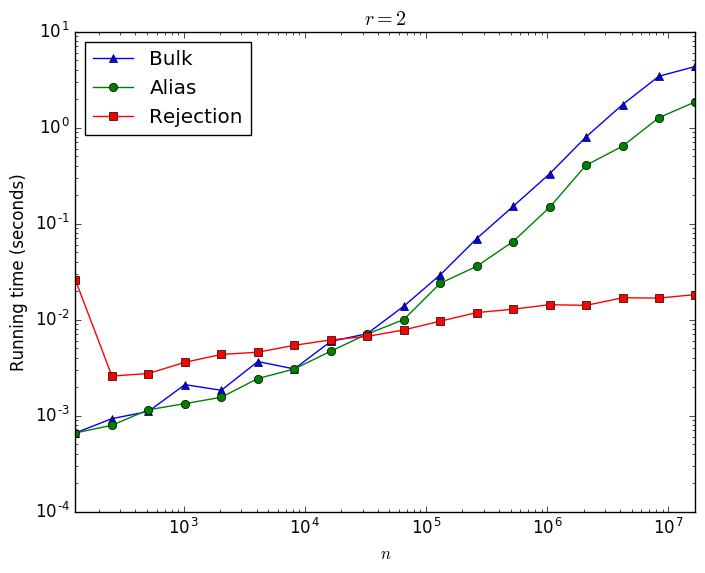

In [5]:
display_perf("2")

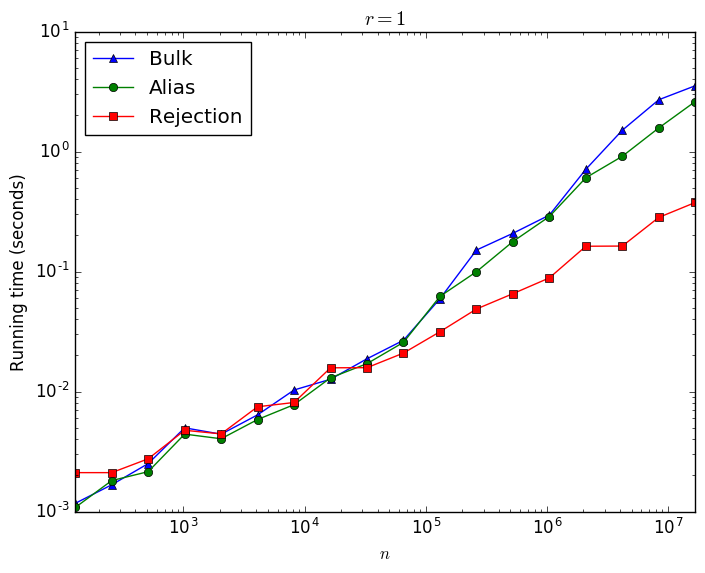

In [6]:
display_perf("1")

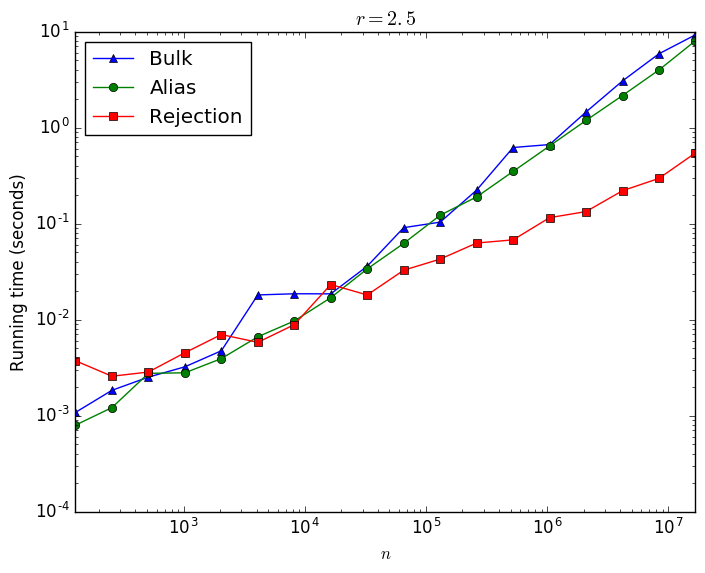

In [7]:
display_perf("2.5")

# Second Example: Six Degrees of Separation

Compute results with values of $n$, $p$ and $q$ that try to mimic Milgram's experiments.

## Functions

In [8]:
using DataFrames
function dunbar(p = 10, q = 380, runs = 10000)
   n = 8500
   r = 0:.1:3
   dist = zeros(length(r))
   for i in 1:length(r)
        dist[i] = expected_delivery_time(n, r[i], p, q, runs)
        IJulia.clear_output(true)
   end
   df = DataFrame(); df[:r] = r
    df[:edt] = dist
    fn = "six_degree_n_$(n)_p_$(p)_q_$(q)_$(runs)_trials.csv"
   writetable(fn, df, separator = ' ', quotemark = ' ')
 end

dunbar (generic function with 4 methods)

## Generation

In [9]:
dunbar(1, 600, 100)
dunbar(10, 380, 100)
dunbar(15, 120, 100)

Expected Delivery Time: 82.27
computed in 0.15 s
Parameters:  n = 8500, r = 3.0, p = 15, q = 120, 100 runs


## Display

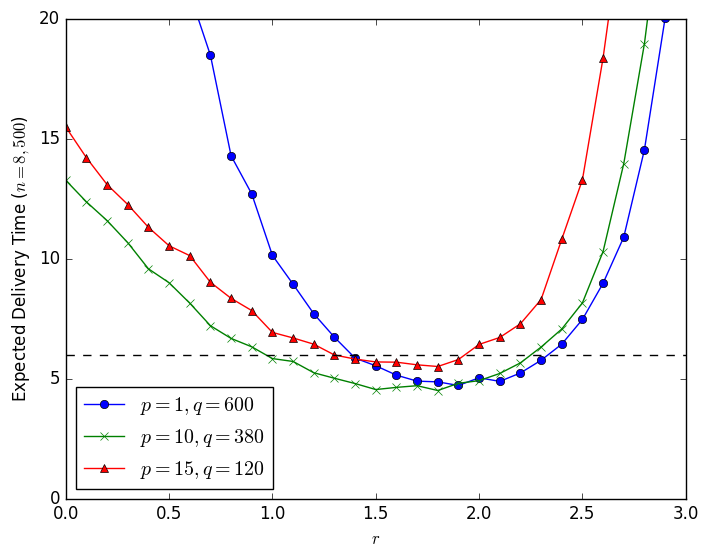

In [10]:
using PyPlot
df = readtable("six_degree_n_8500_p_1_q_600_100_trials.csv", separator = ' ')
plot(df[:r], df[:edt], "-o", label = "\$p = 1, q = 600\$")

df = readtable("six_degree_n_8500_p_10_q_380_100_trials.csv", separator = ' ')
plot(df[:r], df[:edt], "-x", label = "\$p = 10, q = 380\$")

df = readtable("six_degree_n_8500_p_15_q_120_100_trials.csv", separator = ' ')
plot(df[:r], df[:edt], "-^", label = "\$p = 15, q = 120\$")

plot([0,3], [6, 6], "k--")

xlabel("\$ r \$")
ylabel("Expected Delivery Time (\$ n = 8,500 \$)")
ylim([0,20])
xlim([0,3])
legend(loc = 3, numpoints = 1)
show()

# Third Example: The Universe

Go up to very large values of $n$.

In [11]:
using DataFrames
function universe(nn = 10, trials = 10000)
    n = BigInt(10).^(2:nn)
    df = DataFrame(); df[:n] = n
    temps = zeros(length(n))
    distance = zeros(length(n))
    expected_delivery_time(100, 2, 1, 1, 100)
    for i in eachindex(n)
        gc()
        temps[i] = @elapsed distance[i] = expected_delivery_time(n[i], 2, 1, 1, trials)
        IJulia.clear_output(true)

        df[:time] = temps
        df[:edt] = distance
        fn = "universe_nmax_$(nn)_with_$(trials)_trials.csv"
        writetable(fn, df, separator = ' ', quotemark = ' ')
    end
end

universe (generic function with 3 methods)

In [12]:
universe(42, 100)

Expected Delivery Time: 22399.02
computed in 140.06 s
Parameters:  n = 1000000000000000000000000000000000000000000, r = 2, p = 1, q = 1, 100 runs


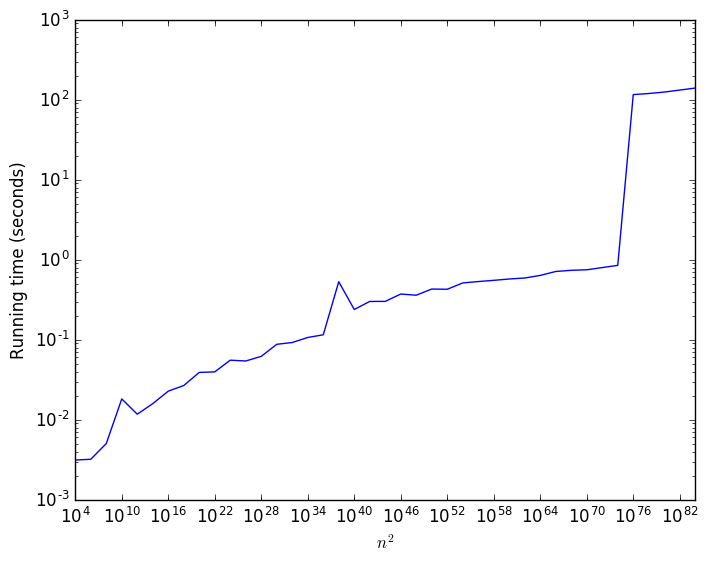

In [13]:
using PyPlot
df = readtable("universe_nmax_42_with_100_trials.csv", separator = ' ', eltypes = [String, Float64, Float64])
loglog(map( (x) -> parse(BigInt, x)^2, df[:n]), df[:time])
xlabel("\$ n^2 \$")
ylabel("Running time (seconds)")
show()

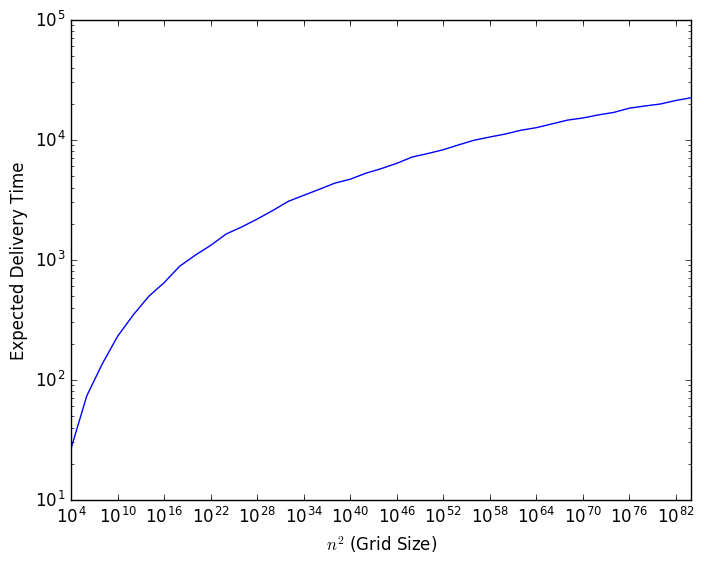

In [14]:
using PyPlot
using DataFrames
df = readtable("universe_nmax_42_with_100_trials.csv", separator = ' ', eltypes = [String, Float64, Float64])
loglog(map( (x) -> parse(BigInt, x)^2, df[:n]), df[:edt])
n = BigInt(10).^(2:41)
xlabel("\$n^2\$ (Grid Size)")
ylabel("Expected Delivery Time")
show()